In [1]:
# importing the libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# reding the dataset 
train_data = pd.read_csv('train.csv')
pred_data = pd.read_csv('test.csv')
print(train_data.head())
print(pred_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [3]:
passengerId = np.array(pred_data['PassengerId'])

In [4]:
# checking if values are nan in any column of the dataset
print(train_data.isnull().sum())#total number of nan values in column
print("    ")
print(pred_data.isnull().sum())
# there are a lot of missing values in cabin this column so we are going to drop this column for creating the model

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
    
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [5]:
# droppimg the columns which i thought would be of no use or having a large number of nan values
train_data = train_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
print(train_data.head())
pred_data = pred_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
print(pred_data.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  34.5      0      0   7.8292        Q
1       3  female  47.0      1      0   7.0000        S
2       2    male  62.0      0      0   9.6875        Q
3       3    male  27.0      0      0   8.6625        S
4       3  female  22.0      1      1  12.2875        S


In [6]:
# we can't drop age column so we filled it with mean value otherwise dropping rows corresponding to nan values would result in loss of a lot of data
# for training set
mean_value = train_data['Age'].mean()
train_data['Age'].fillna(value=mean_value,inplace=True)
# for prediction set
mean_value = pred_data['Age'].mean()
pred_data['Age'].fillna(value=mean_value,inplace=True)

In [7]:
# filling one nan value with the mean in the pred set
mean_value = pred_data['Fare'].mean()
pred_data['Fare'].fillna(value=mean_value,inplace=True)

In [8]:
# checking for nan values again
print(train_data.isnull().sum())
print("       ")
print(pred_data.isnull().sum())
pred_data

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64
       
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50000,0,0,7.8292,Q
1,3,female,47.00000,1,0,7.0000,S
2,2,male,62.00000,0,0,9.6875,Q
3,3,male,27.00000,0,0,8.6625,S
4,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S
414,1,female,39.00000,0,0,108.9000,C
415,3,male,38.50000,0,0,7.2500,S
416,3,male,30.27259,0,0,8.0500,S


In [9]:
# we can drop 2 rows as they are having nan values in embarked column 
train_data = train_data.dropna(axis=0)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [10]:
# separating y_train from the dataset as it is not having the categorical variables
train_X_data = train_data.iloc[:,1:]
y = np.array(train_data['Survived'])
train_X_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct_train = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,-1])], remainder='passthrough')
train_X_data = np.array(ct_train.fit_transform(train_X_data))
ct_pred = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,-1])], remainder='passthrough')
pred_data = np.array(ct_pred.fit_transform(pred_data))

In [12]:
train_X_data = pd.DataFrame(train_X_data)
print(train_X_data.head(),"     ")
pred_data = pd.DataFrame(pred_data)
print(pred_data.head())

     0    1    2    3    4    5    6    7     8    9   10       11
0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  22.0  1.0  0.0   7.2500
1  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  38.0  1.0  0.0  71.2833
2  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  26.0  0.0  0.0   7.9250
3  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  35.0  1.0  0.0  53.1000
4  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  35.0  0.0  0.0   8.0500      
     0    1    2    3    4    5    6    7     8    9   10       11
0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  34.5  0.0  0.0   7.8292
1  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  47.0  1.0  0.0   7.0000
2  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  62.0  0.0  0.0   9.6875
3  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  27.0  0.0  0.0   8.6625
4  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  22.0  1.0  1.0  12.2875


In [13]:
train_X_data = np.array(train_X_data)
train_X_data
X_pred = np.array(pred_data)
X_pred

array([[ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.8292],
       [ 0.    ,  0.    ,  1.    , ...,  1.    ,  0.    ,  7.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  9.6875],
       ...,
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.25  ],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  0.    ,  1.    , ...,  1.    ,  1.    , 22.3583]])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X_data,y,test_size=0.001,random_state=1)

In [15]:
X_train = X_train.T
X_test = X_test.T
X_pred = X_pred.T
y_train = y_train.reshape((1, y_train.shape[0]))
y_test = y_test.reshape((1, y_test.shape[0]))

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_pred.shape)

(12, 888)
(1, 888)
(12, 1)
(1, 1)
(12, 418)


##### Neural network helper functions from scratch

In [17]:
# firstly, there are activation functions which are commomly used
def sigmoid(Z):
    return 1/(1+np.exp(-Z))
def relu(Z):
    return np.maximum(0,Z)

In [18]:
# now, the deriviatives of functions defined above
def sigmoid_deriviative(dA,Z):
    return dA*sigmoid(Z)*(1 - sigmoid(Z))
def relu_deriviative(dA,Z):
    dZ = np.array(dA, copy =True)  # elements in the vector z which are greater than 0, then the deriviative will be this
    dZ[Z<=0] = 0 # elements in the vector z which are 0, then the deriviative will be zero
    return dZ

In [19]:
# parameter initiaization, which we will use during model training
# c is multiplied so that weights do not go much larger
def initialize_parameters(layer_sizes,c=0.001):
    W = []
    b = []
    for i in range(layer_sizes.shape[0]-1):
        W.append(np.random.randn(layer_sizes[i+1], layer_sizes[i])*c)
        b.append(np.random.randn(layer_sizes[i+1],1)*c)
    return W, b

In [20]:
def forward_prop(X, weights, biases):
    
    Z_values=[]
    A_values=[X]
    for l in range(0,len(weights)-1):
        Z=np.dot(weights[l],A_values[l])+biases[l]
        Z_values.append(Z)
        A = relu(Z)
        A_values.append(A)
    ZL= np.dot(weights[len(weights)-1],A)+biases[len(weights)-1] 
    
    Z_values.append(ZL)
    AL=sigmoid(ZL)
    A_values.append(AL)
    return AL, Z_values, A_values

In [21]:
def calculate_cost(A, y):
    m= y.shape[1]
    cost= (1./m) * np.sum(-np.multiply(y,np.log(A)) - np.multiply(1-y, np.log(1-A)))
    return cost

In [22]:
def backward_prop(AL,Y, Z_values, A_values,weights):
    L=len(Z_values)
    m=Y.shape[1]
    grads_weights=[]
    grads_biases=[]
    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    dZ = sigmoid_deriviative(dAL, Z_values[L-1])
    dW = 1./m * np.dot(dZ,A_values[L-1].T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    grads_weights.insert(0,dW)
    grads_biases.insert(0,db)
    
    for l in reversed(range(L-1)):
        dA = np.dot(weights[l+1].T,dZ)
        dZ = relu_deriviative(dA,Z_values[l])
        dW = 1./m * np.dot(dZ,A_values[l].T)
        db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
        grads_weights.insert(0,dW)
        grads_biases.insert(0,db)
    return (grads_weights, grads_biases)

In [23]:
def gradient_descent(learning_rate, grads_weights, grads_biases, weights, biases):
    for l in range(len(weights)):
        weights[l] = weights[l]- learning_rate*grads_weights[l]
        biases[l]= biases[l]- learning_rate*grads_biases[l]
    return weights,biases

In [24]:
def model(X, Y, layers_dims, learning_rate = 0.01, num_iterations = 1000, show_graph=True):
    costs=[]
    weights, biases = initialize_parameters(layers_dims)

    for i in range(num_iterations):
        AL, Z_values, A_values = forward_prop(X, weights, biases) 

        cost = calculate_cost(AL, Y)

        grads_weights, grads_biases = backward_prop(AL, Y, Z_values, A_values, weights) 
        
        weights, biases = gradient_descent(learning_rate, grads_weights, grads_biases, weights, biases)

        if i % (num_iterations/10) == 0:
            print ("Cost after iteration "+str(i)+": "+str(cost))
            costs.append(cost)
        
    if show_graph:
        plt.plot(costs)
        plt.ylabel('cost')
        plt.xlabel('iterations (x '+ str(num_iterations/10)+')')
        plt.title("Learning rate = " + str(learning_rate))
        plt.show()
    return weights, biases

Cost after iteration 0: 0.6932020850298442
Cost after iteration 250: 0.5961556644606708
Cost after iteration 500: 0.5792506880841505
Cost after iteration 750: 0.569705268594539
Cost after iteration 1000: 0.5558212401289917
Cost after iteration 1250: 0.5335286705947628
Cost after iteration 1500: 0.514658917543064
Cost after iteration 1750: 0.5819479920964088
Cost after iteration 2000: 0.5171762589823824
Cost after iteration 2250: 0.5081230422759198


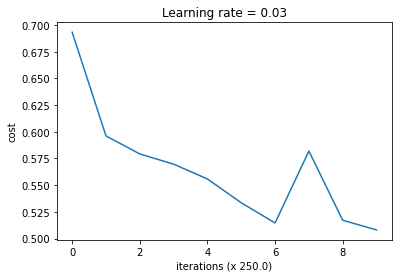

In [25]:
W,b = model(X_train, y_train , np.array([X_train.shape[0],4, 1]), learning_rate = 0.03,num_iterations=2500)

In [26]:
def predict(W,b,X):
    pred,_,_ = forward_prop(X,W,b)
    m = X.shape[1]
    for i in range(m):
        if pred[0,i]>=0.5:
            pred[0,i] = 1
        else:
            pred[0,i] = 0
    return pred

In [27]:
def accuracy(pred, true_lables):
    return np.sum(pred==true_lables)/pred.shape[1]

In [28]:
#accuracy on training set
train_pred = predict(W,b,X_train)
print("Accuracy on the training set is ",accuracy(train_pred, y_train),"%")

Accuracy on the training set is  0.7578828828828829 %


In [29]:
# accuracy on test set
test_pred = predict(W,b,X_test)
print("Accuracy on the training set is ",accuracy(test_pred, y_test),"%")

Accuracy on the training set is  0.0 %


In [30]:
pred = predict(W,b,X_pred)
passengerId = passengerId.reshape((1,pred.shape[1]))
ans = pd.DataFrame(np.concatenate((passengerId.T,pred.T),axis=1))
ans.columns = ['PassengerId','Survived']

In [31]:
submission = ans.to_csv("Submission.csv")